In [63]:
import os
import shutil
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

from sklearn.model_selection import train_test_split

In [2]:
DATASET_DIR    = '../../data/FashionDataSet/'
TRAIN_DIR   = os.path.join(DATASET_DIR, 'train')
TRAIN_INFO_FILE = os.path.join(DATASET_DIR, 'train.csv' )

In [64]:
df_fashion = pd.read_csv(TRAIN_INFO_FILE)
# read labels file
with open(os.path.join(DATASET_DIR, "label_descriptions.json"), 'r') as data_file:
    f_labels = json.load(data_file) 
        
categories = f_labels.get('categories')
label_names = list()
# Iterate over list of categories and create a class out of each category
for c in categories:
    label_names.append(c.get('name').split(',')[0])

['shirt', 'top', 'sweater', 'cardigan', 'jacket', 'vest', 'pants', 'shorts', 'skirt', 'coat', 'dress', 'jumpsuit', 'cape', 'glasses', 'hat', 'headband', 'tie', 'glove', 'watch', 'belt', 'leg warmer', 'tights', 'sock', 'shoe', 'bag', 'scarf', 'umbrella', 'hood', 'collar', 'lapel', 'epaulette', 'sleeve', 'pocket', 'neckline', 'buckle', 'zipper', 'applique', 'bead', 'bow', 'flower', 'fringe', 'ribbon', 'rivet', 'ruffle', 'sequin', 'tassel']


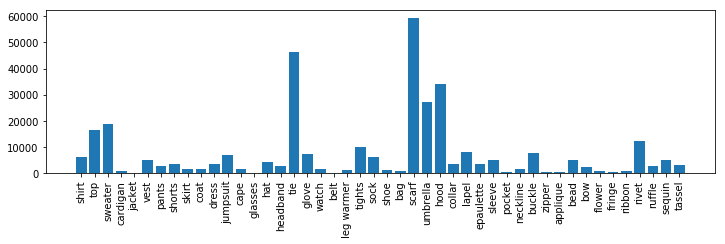

In [65]:
# Clean up classids by removing attributes, so that we can stratify based on class labels
df_fashion['ClassId'] = df_fashion['ClassId'].apply(lambda x: x.split('_')[0])
cnt = df_fashion.groupby('ClassId').count()['ImageId']

plt.figure(figsize=(12, 3))
values = cnt.index.tolist()
counts = cnt.tolist()
plt.bar(values, counts )
plt.xticks(values, label_names, rotation='vertical')
plt.show()

In [66]:
# Split training set based on provided image modalities
# This ensures that model validates on all image modalities.
train_list, val_list = train_test_split(df_fashion.index , test_size=0.2,
                                            random_state=10, stratify=df_fashion['ClassId'] )

Total train images:  45418
Total train segments:  266732


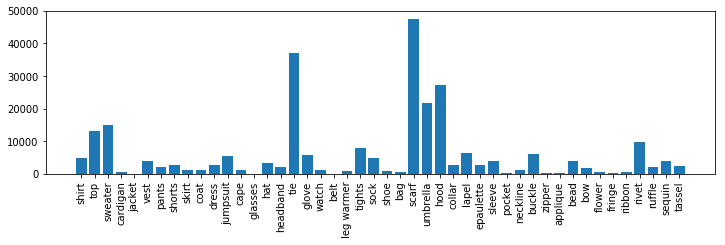

In [67]:
df_train = df_fashion.loc[train_list.tolist()]
print("Total train images: ", len(df_train.ImageId.unique()))
print("Total train segments: ", len(df_train))

tr = df_train.groupby('ClassId').count()['ImageId']

plt.figure(figsize=(12, 3))
values = tr.index.tolist()
counts = tr.tolist()
plt.bar(values, counts )
plt.xticks(values, label_names, rotation='vertical')
plt.show()

Total val images:  33715
Total val segments:  66683


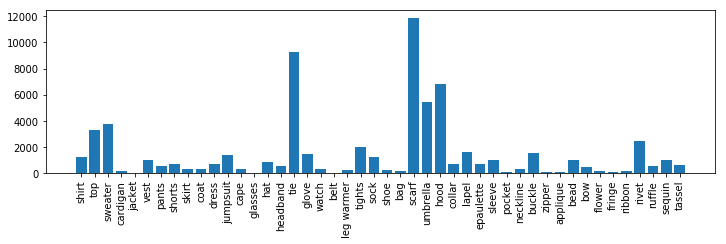

In [68]:
df_val = df_fashion.loc[val_list.tolist()]
print("Total val images: ", len(df_val.ImageId.unique()))
print("Total val segments: ", len(df_val))

val = df_val.groupby('ClassId').count()['ImageId']

plt.figure(figsize=(12, 3))
values = val.index.tolist()
counts = val.tolist()
plt.bar(values, counts )
plt.xticks(values, label_names, rotation='vertical')
plt.show()

In [71]:
df_train.to_csv(os.path.join(DATASET_DIR,"split_train.csv"), index=False)
df_val.to_csv(os.path.join(DATASET_DIR,"split_val.csv"), index=False)

In [72]:
# Verify new vsc files
train_segs = pd.read_csv(os.path.join(DATASET_DIR,"split_train.csv"))
val_segs = pd.read_csv(os.path.join(DATASET_DIR,"split_val.csv"))


print("train_segs", train_segs.shape)
print("train_images", len(train_segs.ImageId.unique()))
print("val_segs", val_segs.shape)
print("val_images", len(val_segs.ImageId.unique()))

train_segs (266732, 5)
train_images 45418
val_segs (66683, 5)
val_images 33715


In [73]:
train_segs.head()

,ImageId,EncodedPixels,Height,Width,ClassId
0,7dd63f7b23b5cb60ff564662da6469fa.jpg,407901 3 408922 7 409943 12 410964 17 411985 2...,1024,683,31
1,0335a1942e83438b3a7b3f1fe0783b9c.jpg,1217561 2 1219360 6 1221159 10 1222958 14 1224...,1800,1201,32
2,f23e7f812b84654c00728b0acae71a88.jpg,755749 15 757153 45 757344 21 758743 65 758938...,1600,1067,4
3,20c8c435c97f2064a53b5aed38086819.jpg,93140 6 94157 18 95177 27 96198 34 97220 38 98...,1024,768,10
4,431afd5ef42f6666f2e3821dfb41b8ea.jpg,224619 7 225717 21 226815 34 227913 46 229010 ...,1100,686,31
